In [4]:
import cPickle
import lab04

x, y = cPickle.load(open("iris.txt", "rb"))
l, t = lab04.divideDataSet(x, y)

# Кросс-валидация для CART

In [16]:
print("Индекс Джини")
print("%.2f" % lab04.cv(x, y, 0, 0, [0, 1, 2, 3], 0, 0))
print("")
print("Энтропия")
print("%.2f" % lab04.cv(x, y, 0, 0, [0, 1, 2, 3], 1, 0))

Индекс Джини
0.95

Энтропия
0.85


# Кросс-валидация для Random Forest

In [18]:
print("Моя реализация с индексом Джини")
print("%.2f" % lab04.cv(x, y, 3, 9, [0, 1, 2, 3], 0, 1))
print("")
print("Моя реализация с Энтропией")
print("%.2f" % lab04.cv(x, y, 3, 9, [0, 1, 2, 3], 1, 1))
print("")
print("Тем временем реализация sklearn выдаёт (код приложил)")
print("0.96")

Моя реализация с индексом Джини
0.94

Моя реализация с Энтропией
0.87

Тем временем реализация sklearn выдаёт (код приложил)
0.96


# Grid Search для фиксированных обучающей и тестовой выборок

In [45]:
import time

l, t = lab04.divideDataSet(x, y)
starting_time = time.clock()
m, number_of_trees, res = lab04.grid_search(l, t, [0, 1, 2, 3], 0)
delta = time.clock() - starting_time

print "Число фич -- " , m
print "Число деревьев -- " ,  number_of_trees
print "Результат на этих данных -- ", res

Число фич --  2
Число деревьев --  7
Результат на этих данных --  0.96


# Развёрнутый анализ алгоритма Random Forest

## Время работы и сравнение результатов с KNN

In [51]:
forest = lab04.Random_forest()
delta1 = -time.clock()
forest.build_random_forest(l, m, number_of_trees, [0, 1, 2, 3], 0)
res_rand = forest.check_class_array(t)
delta1 += time.clock()
time_res = delta + delta1
print "Время работы алгоритма --", "%.2f" % time_res, "с"
print "Результат для Random Forest --", res_rand

Время работы алгоритма -- 42.18 с
Результат для Random Forest -- 0.94


In [53]:
import lab03

print "Результат для KNN --", lab03.kNN(l, t, 3, 0, 2, 0, 0)[1]

Результат для KNN -- 0.94


In [56]:
print("Кросс-валидация для Random Forest с заданными параметрами")
print("%.2f" % lab04.cv(x, y, 2, 7, [0, 1, 2, 3], 0, 1))

Кросс-валидация для Random Forest с заданными параметрами
0.93


In [57]:
print("Кросс-валидация для KNN")
print("%.2f" % lab03.cv(x, y, 3, 0, 2, 0, 0))

Кросс-валидация для KNN
0.95


In [60]:
# Вывод: на наборе ирисов Фишера намного проще, быстрее и эффективнее воспользоваться KNN, а не Random Forest. 
#        Однако это не исключает того факта, что на других данных KNN с большой вероятностью бы проиграл. 

## Поведение Random Forest в экстремальных условиях

In [63]:
print("Одна фича, пятьдесят деревьев")
forest = lab04.Random_forest()
forest.build_random_forest(l, 1, 50, [0, 1, 2, 3], 0)
print "Результат оценки --", forest.check_class_array(t)
print("")
print("Четыре фичи, пятьдесят деревьев")
forest = lab04.Random_forest()
forest.build_random_forest(l, 4, 50, [0, 1, 2, 3], 0)
print "Реузльтат оценки --", forest.check_class_array(t)

Одна фича, пятьдесят деревьев
Результат оценки -- 0.9

Четыре фичи, пятьдесят деревьев
Реузльтат оценки -- 0.92


In [64]:
# Вывод: неплохие, но не оптимальные результаты. Вполне ожидаемо, что с ростом числа фич при большом наборе деревьев 
#        увеличивается точность предсказания.

## Вероятность ошибки при изменении числа фич и деревьев

Populating the interactive namespace from numpy and matplotlib
Зависимость точности Random Forest от числа деревьев (max = 50) при двух фичах


`%matplotlib` prevents importing * from pylab and numpy


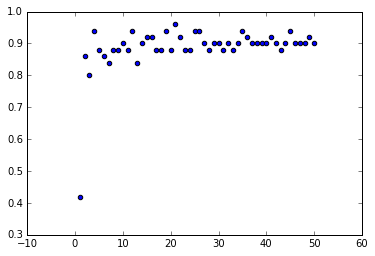

In [74]:
%pylab inline

import matplotlib.pyplot as mp

print("Зависимость точности Random Forest от числа деревьев (max = 50) при двух фичах")
array1 = [i + 1 for i in range(50)]
array_of_results = []
for i in range(50):
    forest = lab04.Random_forest()
    forest.build_random_forest(l, 2, i, [0, 1, 2, 3], 0)
    array_of_results.append(forest.check_class_array(t))
mp.scatter(array1, array_of_results)
mp.show()

Зависимость точности Random Forest от числа фич (max = 4) при десяти деревьях


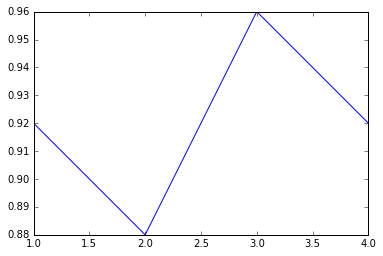

In [78]:
print("Зависимость точности Random Forest от числа фич (max = 4) при десяти деревьях")
array1 = [i + 1 for i in range(4)]
array_of_results = []
for i in range(1, 5):
    forest = lab04.Random_forest()
    forest.build_random_forest(l, i, 10, [0, 1, 2, 3], 0)
    array_of_results.append(forest.check_class_array(t))
mp.plot(array1, array_of_results)
mp.show()